## Sales Analysis

### Import necessary libraries

In [31]:
import pandas as pd
import os


#### Merging 12 month of sales data into a single file

In [15]:
sales_data = pd.read_csv(r'C:\Users\91600\Downloads\Sales_Data\Sales_April_2019.csv')

In [21]:
sales_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [25]:
folder_path = r'C:\Users\91600\Downloads\Sales_Data'

In [27]:
all_data = []

In [33]:
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path , file)
        df = pd.read_csv(file_path)
        all_data.append(df)
    


In [37]:
all_sales_data = pd.concat(all_data , ignore_index=True)

In [53]:
all_sales_data.to_csv('all_sales_data.csv', index = False)


In [55]:
all_sales_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
95,176648,27in FHD Monitor,1,149.99,04/24/19 01:17,"732 2nd St, Portland, OR 97035"
96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016"
97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215"
98,176651,iPhone,1,700,04/07/19 13:14,"997 South St, Boston, MA 02215"


#### Reading updated Dataframe

In [123]:
df = pd.read_csv(r'C:\Users\91600\Downloads\all_sales_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Augment data with some additional columns

#### Add month column

In [163]:
all_sales_data['Month'] = all_sales_data['Order Date'].str[0:2]
all_sales_data['Month'] = all_sales_data['Month'].astype('int32')
all_sales_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a Sales column

In [195]:
all_sales_data['Sales'] = all_sales_data['Quantity Ordered'] * all_sales_data['Price Each']
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a City column

In [303]:
#lets use apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_sales_data['City'] = all_sales_data['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x))
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


## Cleaning up the data

#### Remove the null cells

In [131]:
print(all_sales_data.isnull().sum())



Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64


In [135]:
all_sales_data = all_sales_data.dropna(how = 'all' )


In [137]:
all_sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [145]:
all_sales_data.dropna(inplace=True)

### Remove the 'or' value


In [172]:
all_sales_data = all_sales_data[ all_sales_data['Order Date'].str[0:2] != 'Or']


### Convert columns to correct type

In [183]:
all_sales_data['Quantity Ordered'] = all_sales_data['Quantity Ordered'].astype('int32')
all_sales_data['Price Each'] = all_sales_data['Price Each'].astype('float64')

In [193]:
all_sales_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int32(2), object(4)
memory usage: 11.3+ MB


## Data Exploration!

### Question 1: What was the best month for sales ? How much was earned that month? 

In [232]:
results = all_sales_data.groupby('Month').sum('Sales')
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [228]:
import matplotlib.pyplot as plt



In [264]:

results = all_sales_data.groupby('Month')['Sales'].sum().sort_values()
results

Month
1     1822256.73
9     2097560.13
2     2202022.42
8     2244467.88
6     2577802.26
7     2647775.76
3     2807100.38
5     3152606.75
11    3199603.20
4     3390670.24
10    3736726.88
12    4613443.34
Name: Sales, dtype: float64

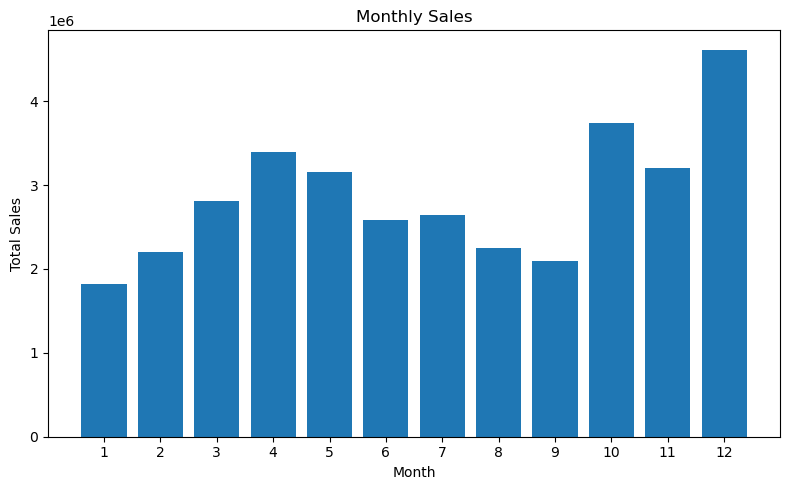

In [280]:
plt.figure(figsize=(8, 5))
plt.bar(results.index, results.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(results.index)
#plt.yticks(results.values)
plt.tight_layout()
plt.show()

### Question 2 : Which City have highest Number of Sales

In [311]:
results = all_sales_data.groupby('City')['Sales'].sum()
results

City
Atlanta, GA          2795498.58
Austin, TX           1819581.75
Boston, MA           3661642.01
Dallas, TX           2767975.40
Los Angeles, CA      5452570.80
New York City, NY    4664317.43
Portland, ME          449758.27
Portland, OR         1870732.34
San Francisco, CA    8262203.91
Seattle, WA          2747755.48
Name: Sales, dtype: float64

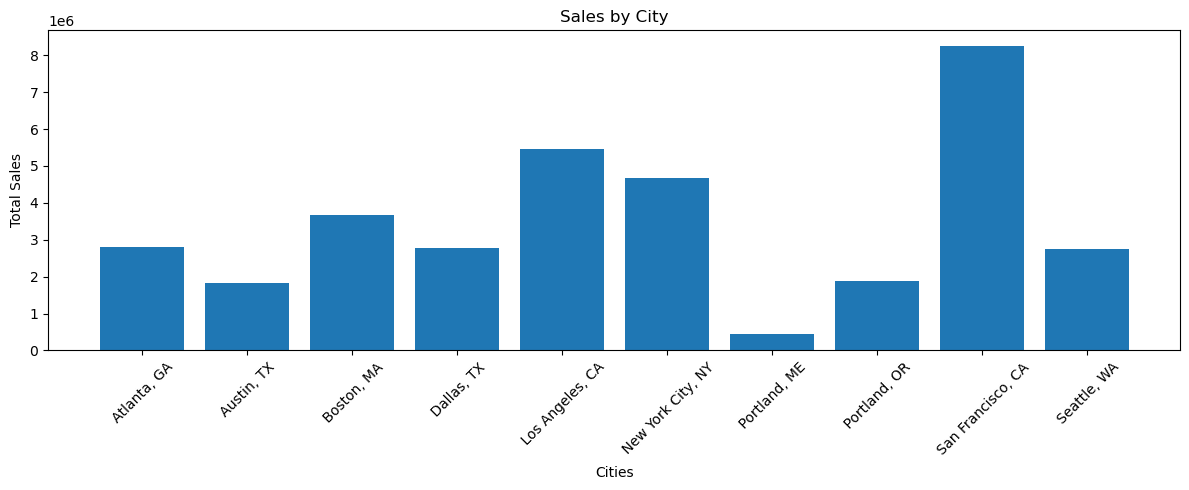

In [327]:
plt.figure(figsize=(12, 5))
plt.bar(results.index, results.values)
plt.xlabel('Cities')
plt.ylabel('Total Sales')
plt.title('Sales by City')
plt.xticks(results.index , rotation=45)
#plt.yticks(results.values)
plt.tight_layout()
plt.show()

### Question 3: What time Should we display advertisement to maximise likelihood of customer's buying product?

In [348]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [338]:
all_sales_data['Order Date'] = pd.to_datetime(all_sales_data['Order Date'])

In [346]:
all_sales_data['Hours'] = all_sales_data['Order Date'].dt.hour
all_sales_data['Minutes'] = all_sales_data['Order Date'].dt.minute

In [364]:
results = all_sales_data.groupby('Hours')['Sales'].sum()
results

Hours
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

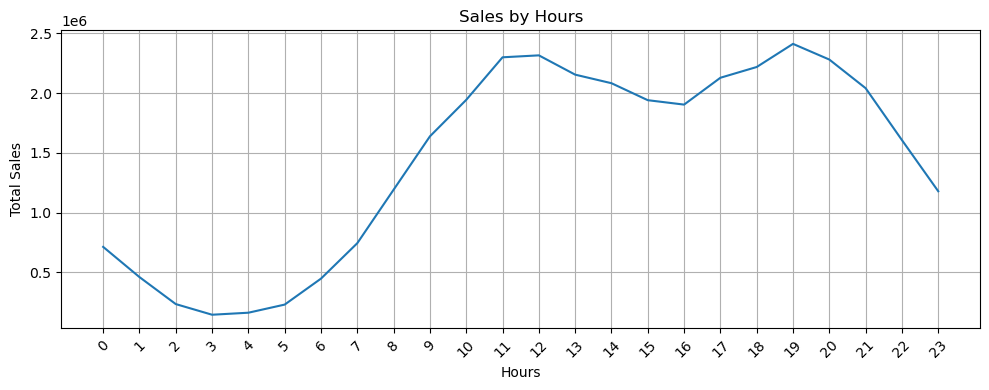

In [366]:
plt.figure(figsize=(10, 4))
plt.plot(results.index, results.values)
plt.xlabel('Hours')
plt.ylabel('Total Sales')
plt.title('Sales by Hours')
plt.xticks(results.index , rotation=45)
#plt.yticks(results.values)
plt.tight_layout()
plt.grid()
plt.show()

#### Question 4 : What products are more often sold together?

In [395]:
df = all_sales_data[all_sales_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x));

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(5)


C:\Users\91600\AppData\Local\Temp\ipykernel_24820\2326780329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x));


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [398]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2 )))

for key, value in count.most_common(10):
    print(key , value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product Sold the most ? why do you think it sold the most?

In [403]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [407]:
most_product = all_sales_data.groupby('Product')['Quantity Ordered'].sum()
most_product

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

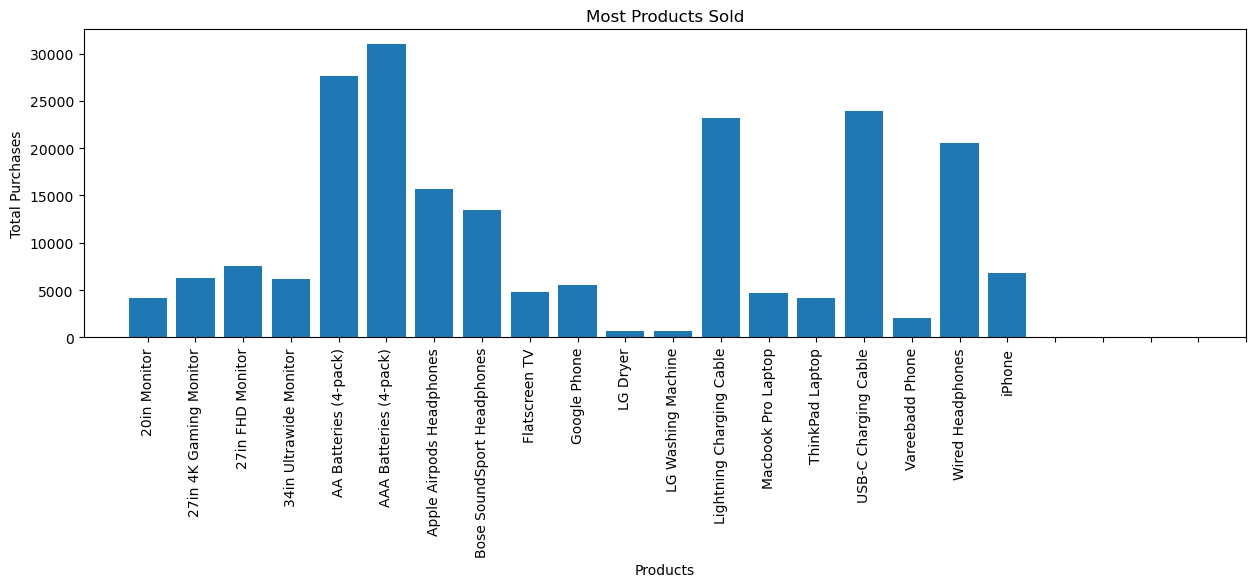

In [425]:
plt.figure(figsize=(15, 4))
plt.bar(most_product.index, most_product.values)
plt.xlabel('Products')
plt.ylabel('Total Purchases')
plt.title('Most Products Sold')
plt.xticks(results.index , rotation=90)
#plt.yticks(results.values)
#plt.tight_layout()

plt.show()

In [431]:
prices = all_sales_data.groupby('Product')['Price Each'].mean()
prices



Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

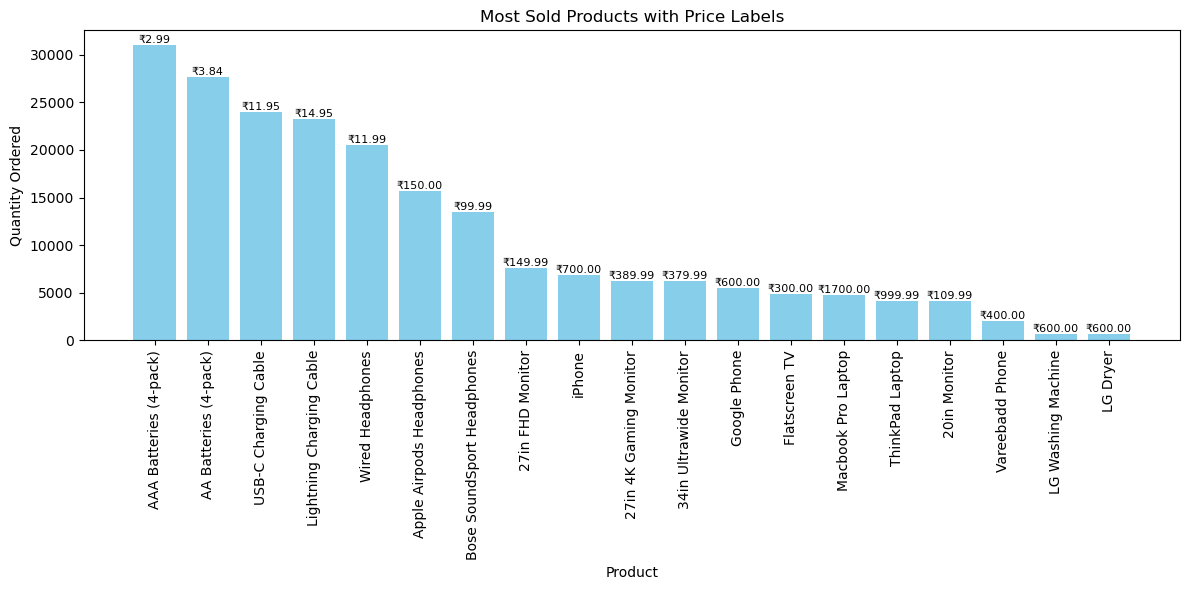

In [433]:


# Combine the sales and price data into one DataFrame
product_data = pd.DataFrame({
    'Total Ordered': most_product,
    'Average Price': prices
})

# Sort by quantity sold for better visuals (optional)
product_data = product_data.sort_values('Total Ordered', ascending=False)

# Plot bar chart for most sold products
plt.figure(figsize=(12, 6))
bars = plt.bar(product_data.index, product_data['Total Ordered'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Most Sold Products with Price Labels')
plt.xticks(rotation=90)

# Add average price labels on top of each bar
for bar, price in zip(bars, product_data['Average Price']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'₹{price:.2f}', 
             ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()
